# Zomato data analysis project.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

The history saving thread hit an unexpected error (OperationalError('attempt to write a readonly database')).History will not be written to the database.


In [2]:
df = pd.read_csv('https://media.geeksforgeeks.org/wp-content/uploads/20250117023324808265/Zomato-data-.csv')
df.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1/5,775,800,Buffet
1,Spice Elephant,Yes,No,4.1/5,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8/5,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,300,Buffet
4,Grand Village,No,No,3.8/5,166,600,Buffet


In [3]:
df.sample(5)

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
38,Empire Restaurant,Yes,No,4.4/5,4884,750,other
47,Recipe,Yes,No,4.0/5,804,450,Dining
104,CAFE NOVA,No,No,3.2/5,11,600,Dining
46,Kitchen Garden,Yes,No,3.6/5,244,300,Dining
21,Woodee Pizza,Yes,No,3.7/5,180,500,Cafes


In [4]:
df.shape

(148, 7)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   name                         148 non-null    object
 1   online_order                 148 non-null    object
 2   book_table                   148 non-null    object
 3   rate                         148 non-null    object
 4   votes                        148 non-null    int64 
 5   approx_cost(for two people)  148 non-null    int64 
 6   listed_in(type)              148 non-null    object
dtypes: int64(2), object(5)
memory usage: 8.2+ KB


In [6]:
df.isnull().sum()

name                           0
online_order                   0
book_table                     0
rate                           0
votes                          0
approx_cost(for two people)    0
listed_in(type)                0
dtype: int64

No missing values.

In [7]:
df.duplicated().sum()

0

No duplicate rows.

In [8]:
df.describe()

,votes,approx_cost(for two people)
count,148.000000,148.000000
mean,264.810811,418.243243
std,653.676951,223.085098
min,0.000000,100.000000
25%,6.750000,200.000000
50%,43.500000,400.000000
75%,221.750000,600.000000
max,4884.000000,950.000000


In [9]:
df.corr(numeric_only=True)

,votes,approx_cost(for two people)
votes,1.000000,0.324372
approx_cost(for two people),0.324372,1.000000


## Conclusion

* We have 148 rows and 7 columns.
* No missing and duplicate values.


In [10]:
df.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1/5,775,800,Buffet
1,Spice Elephant,Yes,No,4.1/5,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8/5,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,300,Buffet
4,Grand Village,No,No,3.8/5,166,600,Buffet


Let's fix the rate column and remove denominator and convert ints type to `float`.

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   name                         148 non-null    object
 1   online_order                 148 non-null    object
 2   book_table                   148 non-null    object
 3   rate                         148 non-null    object
 4   votes                        148 non-null    int64 
 5   approx_cost(for two people)  148 non-null    int64 
 6   listed_in(type)              148 non-null    object
dtypes: int64(2), object(5)
memory usage: 8.2+ KB


In [12]:
df['rate'] = df['rate'].str.split('/').str[0].astype('float')

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   name                         148 non-null    object 
 1   online_order                 148 non-null    object 
 2   book_table                   148 non-null    object 
 3   rate                         148 non-null    float64
 4   votes                        148 non-null    int64  
 5   approx_cost(for two people)  148 non-null    int64  
 6   listed_in(type)              148 non-null    object 
dtypes: float64(1), int64(2), object(4)
memory usage: 8.2+ KB


In [14]:
df.sample(2)

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
30,Redberrys,Yes,No,4.0,219,600,Cafes
91,Sunsadm,No,No,3.7,0,400,Dining


Done ✅

Lets explore `listed_in(type)` column.

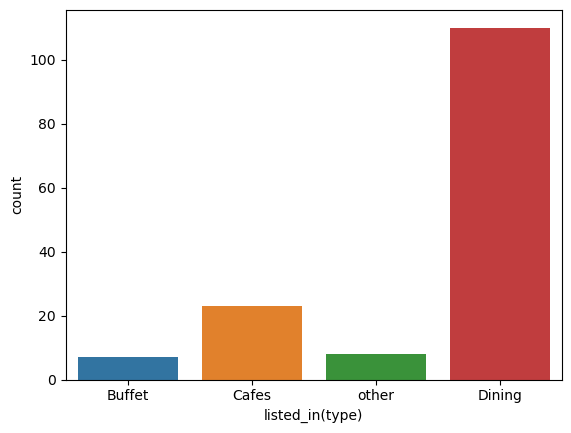

In [15]:
sns.countplot(x=df['listed_in(type)'], hue=df['listed_in(type)']);

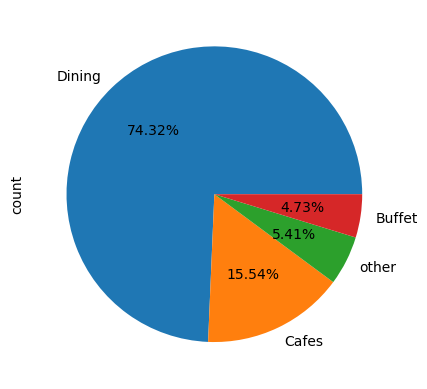

In [16]:
df['listed_in(type)'].value_counts().plot(kind='pie', autopct='%1.2f%%');

**Conclusion:** The majority (74.3%) of restaurants falls in `Dinning` category.

In [17]:
df.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet


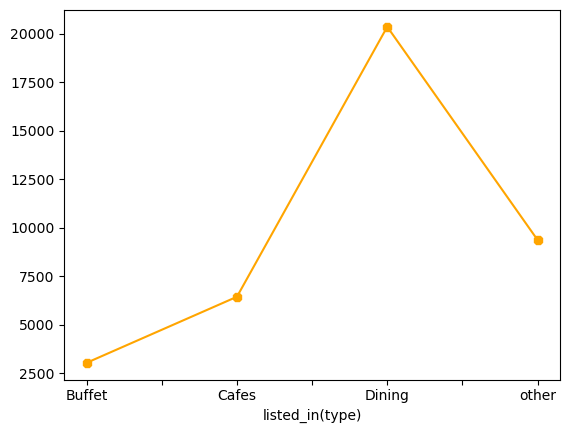

In [18]:
df.groupby("listed_in(type)")['votes'].sum().plot(kind='line', color='orange', marker='8');

Also shows the same as above.

## Q. Name of the restaurant that recieved most votes?

In [19]:
df.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet


In [20]:
df[df['votes'] == df['votes'].max()]['name']

38    Empire Restaurant
Name: name, dtype: object

✅

Lets explore `online_order` column.

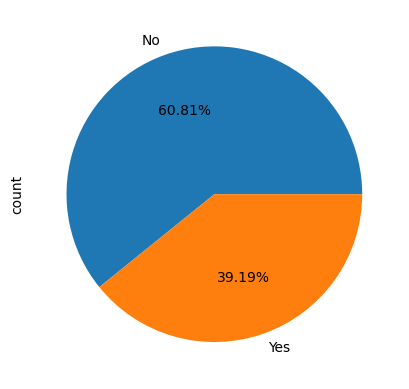

In [21]:
df['online_order'].value_counts().plot(kind='pie', autopct='%1.2f%%');

**Conclusion:** Over 60% of restaurants do not accept online orders.

Now explore next column `book_table`.

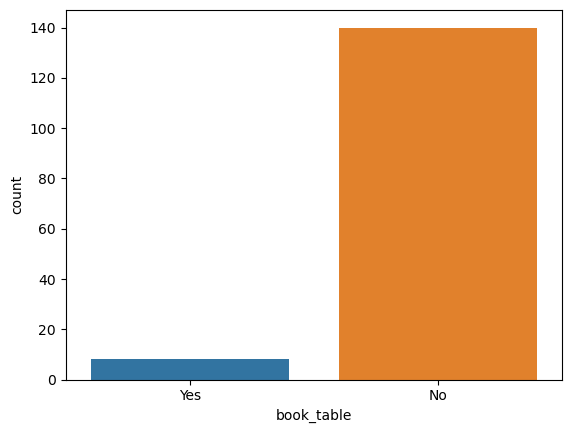

In [22]:
sns.countplot(x=df['book_table'], hue=df['book_table']);

**Conclusion:** Majority of the restaurants do not have booked table.

Next column `rate` column

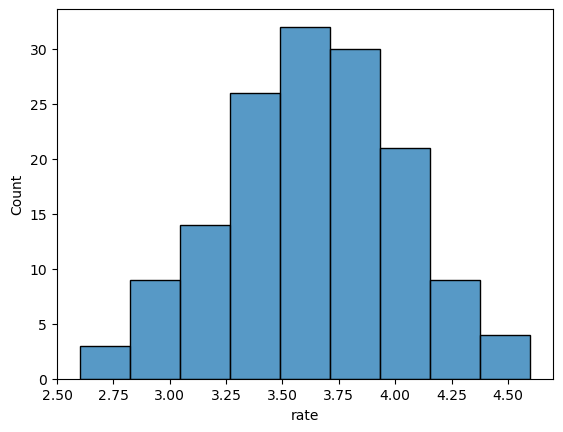

In [23]:
sns.histplot(df['rate']);

**Conclusion:** The majority of restaurants received rating between `3.25 - 4.00`.

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   name                         148 non-null    object 
 1   online_order                 148 non-null    object 
 2   book_table                   148 non-null    object 
 3   rate                         148 non-null    float64
 4   votes                        148 non-null    int64  
 5   approx_cost(for two people)  148 non-null    int64  
 6   listed_in(type)              148 non-null    object 
dtypes: float64(1), int64(2), object(4)
memory usage: 8.2+ KB


Column `approx_cost(for two people)`

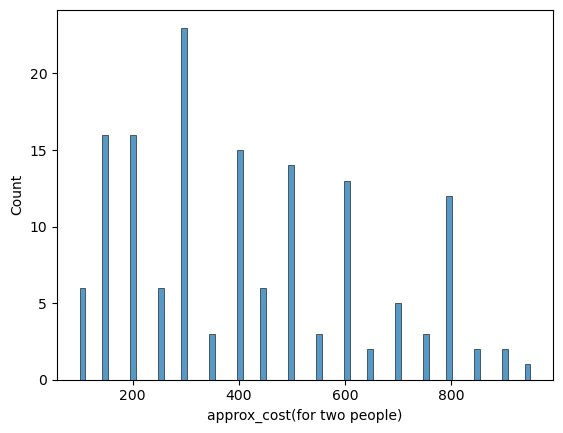

In [25]:
sns.histplot(df['approx_cost(for two people)'], bins=80);

**Conclusion:** Most of couples prefer restaurants with an cost of 350rs.

In [26]:
df.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet


## Q. Lets examine online orders gets higher ratings or offline?

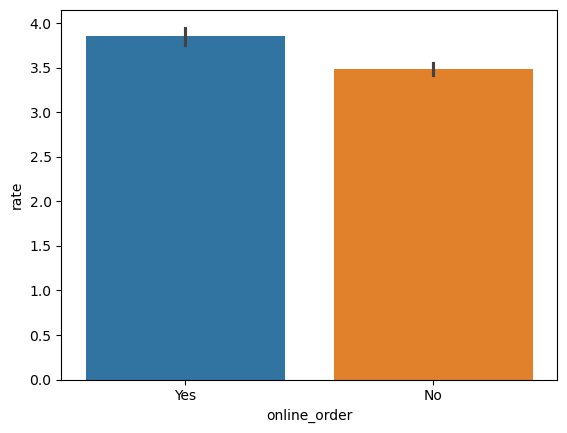

In [27]:
sns.barplot(x=df['online_order'], y=df['rate'], hue=df['online_order']);

**Conclusion:** Online orders gets higher ratings than offline orders.

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   name                         148 non-null    object 
 1   online_order                 148 non-null    object 
 2   book_table                   148 non-null    object 
 3   rate                         148 non-null    float64
 4   votes                        148 non-null    int64  
 5   approx_cost(for two people)  148 non-null    int64  
 6   listed_in(type)              148 non-null    object 
dtypes: float64(1), int64(2), object(4)
memory usage: 8.2+ KB


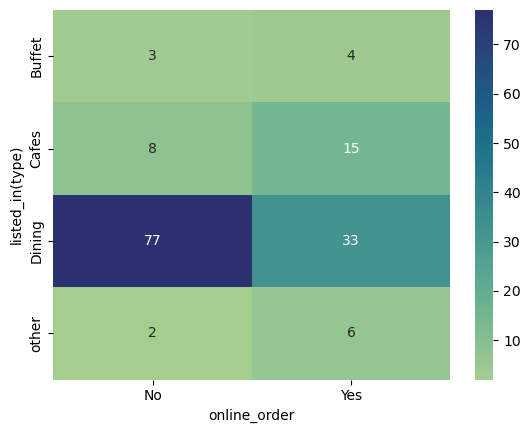

In [39]:
sns.heatmap(pd.crosstab(df['listed_in(type)'],df['online_order']), annot=True, cmap="crest");

**Conclusion:** Dinning restaurants primarily accept offline orders, whereas cafes primarily receive online orders.

# Final Conclusions:
* The majority (74.3%) of restaurants falls in `Dinning` category.
* `Empire Restaurant` received most votes.
* Over 60% of restaurants do not accept `online_orders`.
* Majority of the restaurants do not have `booked_table`.
* The majority of restaurants received `rating` between `3.25 - 4.00`.
* Most of couples prefer restaurants with an `cost` of `350rs`.
* `Online_orders` gets higher `ratings` than `offline_orders`.
* `Dinning` restaurants primarily accept `offline_orders`, whereas `cafes` primarily receive `online_orders`.